# Test experiment with mock instrument.

Author: Guen P <guen@nbi.dk>

In [2]:
%matplotlib inline
# optional, if you want fancy zoomable plots. slows down the browser tho!
# import mpld3
# mpld3.enable_notebook()
# Set to DEBUG if you want verbosity
import athena
athena.athena_conf.set_logging_config('INFO')

This loads the instruments specified by dummy_setup.json. You can find the mock instrument driver in instruments/mock_instrument.json

In [3]:
setup=athena.init_setup('dummy_setup')
athena.new_folder('test_01') # Create a new data subfolder in data/

In [4]:
setup

Now you can get and set each instrument channel directly through the setup object

In [5]:
setup.mock.wave.get()

-0.3634579337000035

In [6]:
setup.mock.testfunc.set(1)

In [7]:
setup.mock.testfunc.get()

1.0

In [8]:
setup.mock.testfunc2_x.set(2)

In [9]:
setup.mock.funky_prop.set('chocolate')

In [10]:
setup.mock.funky_prop.get()

'chocolate'

Experiment class to make our life easier. Create experimental variables that map onto instrument channels and define them as class properties.

In [11]:
import experiment
import imp; imp.reload(experiment)
class my_experiment(experiment.Experiment):
    def __init__(self, setup, Rbias=1e6):
        chan_dict = {} # dictionary of channels to be converted to class properties (gettable and, optionally, settable)
        chan_dict['wave'] = setup.mock.wave
        chan_dict['timer'] = setup.timer
        chan_dict['testfunc'] = setup.mock.testfunc
        self.metadata = { # static metadata
        'Rbias': Rbias}
        self.meta = { # dynamic metadata
            'funky property': setup.mock.funky_prop
        }
        super(my_experiment, self).__init__(setup, chan_dict)

In [12]:
ex = my_experiment(setup)

In [13]:
ex

Now you can get and set the values of each channel via a class property

In [14]:
ex.timer

4.0531158447265625e-06

In [15]:
ex.wave

0.6247580258761538

In [16]:
ex.testfunc

1.0

This should take a while - see mock_instrument.json, the step size = 0.1 with step delay = 100ms

In [17]:
ex.testfunc = 5

In [18]:
ex.testfunc

5.0

### Simple test measurement with live plotting

Saves data as a csv

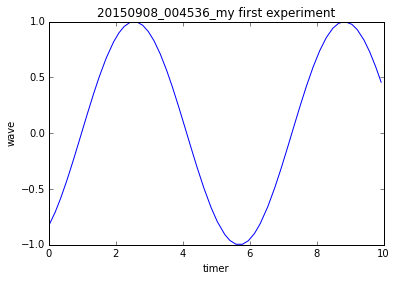

In [22]:
from athena.measurement_framework import data

d = data.Data('my first experiment', ex)
d.plot('timer', 'wave')

setup.timer.reset()
while ex.timer<10:
    d.measure()
d.end()

### ND sweeps and plotting (not live yet)

Saves data as tab-delimited .dat

In [19]:
import numpy as np

In [20]:
ex.sweep('timer',
        np.arange(0,10),
        wait = 1).sweep('testfunc',
        np.arange(0,10)).run('Sweep timer, step testfunc')

20150908_004318
Sweep timer, step testfunc


Bug: The above command should print the date and timestamp but somehow it does it after the measurement finished. Alternatively, you can open a second ipython notebook and run the code below.

In [40]:
data.get_latest()

'20150908_004318'

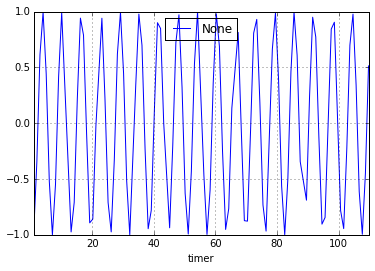

In [29]:
from athena.measurement_framework import data
d = data.get('20150908_004318')
d.plot('timer', 'wave')

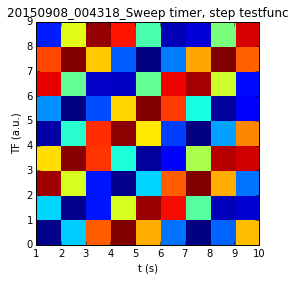

In [37]:
import pylab as pl
%matplotlib inline
t,tf,w = (data.get_matrix(d,s,10) for s in [d.timer, d.testfunc, d.wave])
pl.figure(figsize=(4,4))
pl.pcolor(np.ones(10)*t[0],tf,w)
pl.xlabel('t (s)')
pl.ylabel('TF (a.u.)')
pl.title(d.meta['name'])
pl.xlim(1,10);
pl.ylim(0,9);